<a href="https://colab.research.google.com/github/deepakgowtham/EVA4/blob/master/Week8/Session_8_CIFAR_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!cp -rp '/content/drive/My Drive/py_files/models' .
!cp -rp '/content/drive/My Drive/py_files/utils' .

In [0]:
from utils.download_load import download_load
from utils.display_imgs import display_imgs
from utils.train_test import train , test
from utils.disp_summary import disp_summary
from models.resnet import ResNet18

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary
import torch

In [0]:
trainset, testset, train_loader, test_loader, classes =download_load()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


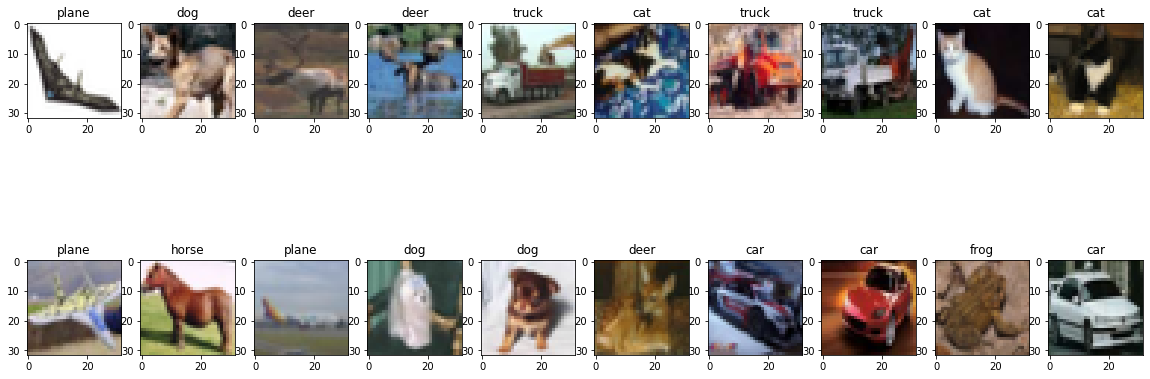

In [0]:
display_imgs(train_loader, classes)

In [0]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model=ResNet18().to(device)

In [0]:
disp_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

/content/models/resnet.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


In [0]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
#model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = OneCycleLR(optimizer,max_lr=0.5,total_steps=20)

for epoch in range(1, 21):
    print(f'Epoch: {epoch} Learning_Rate {scheduler.get_lr()}')
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate [0.020000000000000018]


/content/models/resnet.py:89: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=1.039446234703064 Batch_id=781 Accuracy=44.84: 100%|██████████| 782/782 [01:03<00:00, 13.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.3029, Accuracy: 5853/10000 (58.53%)

Epoch: 2 Learning_Rate [0.06583592135001265]


Loss=1.5143535137176514 Batch_id=781 Accuracy=63.30: 100%|██████████| 782/782 [01:06<00:00, 11.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8672, Accuracy: 7011/10000 (70.11%)

Epoch: 3 Learning_Rate [0.18583592135001265]


Loss=0.7852609753608704 Batch_id=781 Accuracy=72.63: 100%|██████████| 782/782 [01:08<00:00, 11.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7213, Accuracy: 7457/10000 (74.57%)

Epoch: 4 Learning_Rate [0.3341640786499874]


Loss=0.5353944301605225 Batch_id=781 Accuracy=79.43: 100%|██████████| 782/782 [01:09<00:00, 11.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6254, Accuracy: 7930/10000 (79.30%)

Epoch: 5 Learning_Rate [0.45416407864998737]


Loss=0.9718643426895142 Batch_id=781 Accuracy=83.76: 100%|██████████| 782/782 [01:09<00:00, 11.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5802, Accuracy: 8080/10000 (80.80%)

Epoch: 6 Learning_Rate [0.5]


Loss=0.2996790409088135 Batch_id=781 Accuracy=87.65: 100%|██████████| 782/782 [01:09<00:00, 11.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6602, Accuracy: 7861/10000 (78.61%)

Epoch: 7 Learning_Rate [0.49373200311754367]


Loss=0.20791244506835938 Batch_id=781 Accuracy=91.05: 100%|██████████| 782/782 [01:09<00:00, 11.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6366, Accuracy: 8084/10000 (80.84%)

Epoch: 8 Learning_Rate [0.47524231600673683]


Loss=0.41199424862861633 Batch_id=781 Accuracy=93.71: 100%|██████████| 782/782 [01:09<00:00, 11.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6499, Accuracy: 8129/10000 (81.29%)

Epoch: 9 Learning_Rate [0.445458088785525]


Loss=0.09565562009811401 Batch_id=781 Accuracy=95.95: 100%|██████████| 782/782 [01:09<00:00, 11.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6847, Accuracy: 8203/10000 (82.03%)

Epoch: 10 Learning_Rate [0.40587282697488153]


Loss=0.0332341194152832 Batch_id=781 Accuracy=97.15: 100%|██████████| 782/782 [01:09<00:00, 11.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6677, Accuracy: 8395/10000 (83.95%)

Epoch: 11 Learning_Rate [0.3584715008956504]


Loss=0.06135749816894531 Batch_id=781 Accuracy=98.10: 100%|██████████| 782/782 [01:09<00:00, 11.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7153, Accuracy: 8415/10000 (84.15%)

Epoch: 12 Learning_Rate [0.30563101096814466]


Loss=0.00828319787979126 Batch_id=781 Accuracy=98.95: 100%|██████████| 782/782 [01:09<00:00, 11.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7226, Accuracy: 8468/10000 (84.68%)

Epoch: 13 Learning_Rate [0.250001]


Loss=0.02354586124420166 Batch_id=781 Accuracy=99.27: 100%|██████████| 782/782 [01:09<00:00, 11.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7414, Accuracy: 8564/10000 (85.64%)

Epoch: 14 Learning_Rate [0.19437098903185537]


Loss=0.0035536885261535645 Batch_id=781 Accuracy=99.64: 100%|██████████| 782/782 [01:09<00:00, 11.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8055, Accuracy: 8594/10000 (85.94%)

Epoch: 15 Learning_Rate [0.14153049910434962]


Loss=0.00018465518951416016 Batch_id=781 Accuracy=99.93: 100%|██████████| 782/782 [01:09<00:00, 11.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8360, Accuracy: 8658/10000 (86.58%)

Epoch: 16 Learning_Rate [0.09412917302511849]


Loss=3.0040740966796875e-05 Batch_id=781 Accuracy=99.97: 100%|██████████| 782/782 [01:08<00:00, 11.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8887, Accuracy: 8634/10000 (86.34%)

Epoch: 17 Learning_Rate [0.05454391121447502]


Loss=7.557868957519531e-05 Batch_id=781 Accuracy=99.99: 100%|██████████| 782/782 [01:09<00:00, 11.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8831, Accuracy: 8651/10000 (86.51%)

Epoch: 18 Learning_Rate [0.024759683993263143]


Loss=0.16864919662475586 Batch_id=781 Accuracy=99.99: 100%|██████████| 782/782 [01:09<00:00, 11.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8831, Accuracy: 8675/10000 (86.75%)

Epoch: 19 Learning_Rate [0.006269996882456277]


Loss=1.6689300537109375e-06 Batch_id=781 Accuracy=99.99: 100%|██████████| 782/782 [01:09<00:00, 11.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8758, Accuracy: 8677/10000 (86.77%)

Epoch: 20 Learning_Rate [2e-06]


Loss=0.00011157989501953125 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 11.27it/s]



Test set: Average loss: 0.8791, Accuracy: 8647/10000 (86.47%)

